# TFIDF 활용 문서 유사도 측정

### [코사인 유사도 (Cosine Similarity)]
* 두 벡터가 이루는 각도를 이용해 유사도를 측정하는 방법
    * 벡터 간의 방향이 얼마나 비슷한지를 측정 -> 0에서 1 사이의 값으로 유사도를 나타냄
        * 1에 가까울수록 두 벡터의 방향이 유사하고, 0에 가까울수록 서로 직각을 이룸
        * 방향성만 고려하므로 각 문서들의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있음
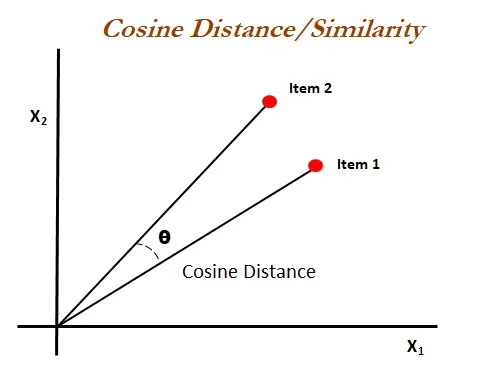 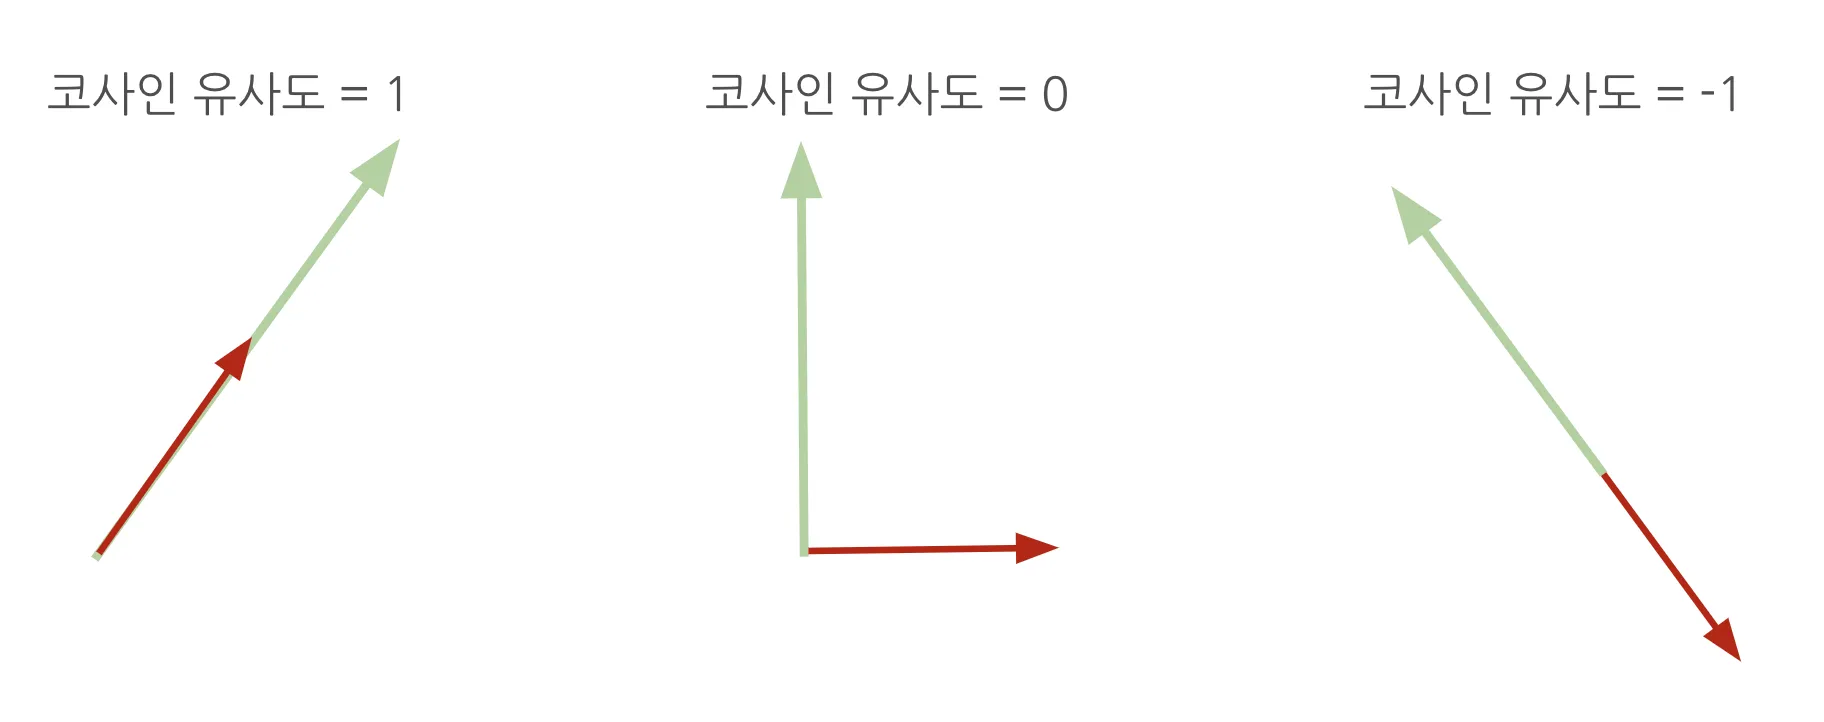

In [1]:
sample_corpus = [
    '자연어처리 강의를 시작하겠습니다.',
    '자연어처리는 재미있습니다.',
    '밥을 먹고 강의를 듣고 있습니다.',
    '이번 자연어처리 강의는 한국어 자연어처리입니다.' 
]

In [2]:
# tfidf 특징 벡터 추출
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

sample_tv = TfidfVectorizer(tokenizer=Okt().nouns)
sample_dtm = sample_tv.fit_transform(sample_corpus)
print(sample_dtm.toarray())

C:\Users\User\anaconda3\envs\deepnlpenv\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0.42817512 0.         0.67081906 0.         0.42817512 0.42817512
  0.        ]
 [0.         0.         0.         0.         0.70710678 0.70710678
  0.        ]
 [0.53802897 0.84292635 0.         0.         0.         0.
  0.        ]
 [0.26813356 0.         0.         0.42008304 0.53626713 0.53626713
  0.42008304]]


In [3]:
# 문서 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
result = cosine_similarity(sample_dtm[0], sample_dtm[2])
print(result)

[[0.23037062]]


In [4]:
# 1번 문서와 문서 전체와의 코사인 유사도 
result = cosine_similarity(sample_dtm[0], sample_dtm)[0]
print(result)
print(result.argsort()[::-1][1:3])

[1.         0.60553106 0.23037062 0.5740406 ]
[1 3]


In [5]:
# 코사인 유사도 행렬 생성
cosine_sim = cosine_similarity(sample_dtm, sample_dtm)
print(cosine_sim)

[[1.         0.60553106 0.23037062 0.5740406 ]
 [0.60553106 1.         0.         0.75839625]
 [0.23037062 0.         1.         0.14426363]
 [0.5740406  0.75839625 0.14426363 1.        ]]


# 문서 유사도 기반 영화 추천 시스템
1. 데이터 준비 -> 특징 벡터 추출 -> 코사인 유사도 행렬 생성
2. 입력 영화 제목과 전체 영화와의 문서 유사도 추출
3. 유사도가 높은 순서대로 영화 제목 출력

In [6]:
# 한국 영화 데이터 샘플 
data_filename = 'korean_movie_sample.json'

import pandas as pd
kmovie_df = pd.read_json('./data/'+data_filename)
kmovie_df.head()

name  genre                                            content
0    올드보이    스릴러  술 좋아하고 떠들기 좋아하는 오.대.수. 본인의 이름풀이를 오늘만 대충 수습하며 살...
1     노트북    로맨스  17살, ‘노아’는 밝고 순수한 ‘앨리’를 보고 첫눈에 반한다. 빠른 속도로 서로에...
2  미션임파서블     액션  도난당한 핵무기를 되찾아 오는 위험천만한 작전 중, 에단 헌트(톰 크루즈)는 임무를...
3  니모를찾아서  애니메이션  “디즈니`픽사 최고의 애니메이션이 3D로 다시 찾아온다!” 호기심 가득한 아기 물고...
4      탑건     액션  해군 최신 전투기 F-14기를 모는 젊은 조종사 매버릭 대위(톰 크루즈)는 최고의 ...

In [7]:
# 데이터 확인
#len(kmovie_df)
kmovie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     18 non-null     object
 1   genre    9 non-null      object
 2   content  18 non-null     object
dtypes: object(3)
memory usage: 560.0+ bytes


In [8]:
# tfidf 특징 벡터 추출
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

kmovie_tv = TfidfVectorizer(tokenizer=Okt().nouns)
kmovie_dtm = kmovie_tv.fit_transform(kmovie_df.content)
print(kmovie_dtm.toarray())

C:\Users\User\anaconda3\envs\deepnlpenv\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[[0.0499168  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.155129   0.         0.13578303]]


In [9]:
# 코사인 유사도 행렬 생성
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
kmovie_cs = cosine_similarity(kmovie_dtm)


title = '노트북'
#title = '베테랑'
numRec = 3

# 영화 제목에 해당하는 코사인 유사도 행 찾아오기
result_df = kmovie_df[kmovie_df.name == title]

if result_df.empty:
    print("없는 영화입니다.")
else:
    idx = result_df.index[0]
    result_index = kmovie_cs[idx]
    print(result_index)
    # 내림차순으로 정렬하고, 입력 영화를 제외한 5개의 영화 추출
    result = result_index.argsort()[::-1][1:numRec+1]
    print(result)
    # 제목 추출
    print(kmovie_df.name[result])

[0.05346985 1.         0.0308185  0.04424034 0.01129567 0.04938917
 0.02710961 0.01890723 0.0306105  0.0527623  0.01546059 0.08219293
 0.00450876 0.00736985 0.07814366 0.05826683 0.01787213 0.02257018]
[11 14 15]
11        어바웃 타임
14      지금만나러갑니다
15    007 노타임투다이
Name: name, dtype: object


In [11]:
# MovieRecommender 클래스 선언

class MovieRecommender:

    # 생성자 (제목 리스트, 컨텐츠 리스드, 토크나이저)
    def __init__(self, titles, contents, tokenizer):
        self.title_df = pd.DataFrame(titles, columns=['title'])
        print(self.title_df.head())
        tv = TfidfVectorizer(tokenizer=tokenizer)
        tfidf_dtm = tv.fit_transform(contents)
        self.cosine_sim = cosine_similarity(tfidf_dtm, tfidf_dtm)
        print(self.cosine_sim)

    # 추천 영화 제목 리스트 추출 (영화 제목)
    def get_recommendation(self, title, num_result=5):
        result_df = self.title_df[self.title_df.title == title]
        
        if result_df.empty:
            return None
        
        idx = result_df.index[0]
        result_index = self.cosine_sim[idx]
        #print(result_index)
        # 내림차순으로 정렬하고, 입력 영화를 제외한 5개의 영화 추출
        result = result_index.argsort()[::-1][1:num_result+1]
        #print(result)
        #제목 추출
        return list(self.title_df.title[result])


In [12]:
# 클래스 확인을 위한 객체 생성
mr = MovieRecommender(list(kmovie_df.name), kmovie_df.content, Okt().nouns)

    title
0    올드보이
1     노트북
2  미션임파서블
3  니모를찾아서
4      탑건
[[1.         0.05346985 0.00815408 0.02598133 0.02489726 0.09033045
  0.03169268 0.02828125 0.05328203 0.02208258 0.05807529 0.09467966
  0.03134634 0.04092101 0.10436681 0.05744351 0.04525102 0.02740066]
 [0.05346985 1.         0.0308185  0.04424034 0.01129567 0.04938917
  0.02710961 0.01890723 0.0306105  0.0527623  0.01546059 0.08219293
  0.00450876 0.00736985 0.07814366 0.05826683 0.01787213 0.02257018]
 [0.00815408 0.0308185  1.         0.05514742 0.04701743 0.00618831
  0.03835193 0.06804138 0.01554361 0.         0.01707722 0.05053579
  0.04263    0.02349691 0.01329795 0.13015704 0.08291804 0.01188698]
 [0.02598133 0.04424034 0.05514742 1.         0.02567274 0.02986818
  0.03996504 0.05510774 0.02691619 0.01068241 0.01980984 0.07099626
  0.0087309  0.01618364 0.02556933 0.0382948  0.05094044 0.04226183]
 [0.02489726 0.01129567 0.04701743 0.02567274 1.         0.
  0.01468754 0.         0.00743561 0.01032994 0.         0.0

C:\Users\User\anaconda3\envs\deepnlpenv\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
# 입력한 영화 제목과 유사한 영화 리스트 출력
title = '해리포터'
#title = '베테랑'
result = mr.get_recommendation(title, 3)
if result:
    print(result)
else:
    print("없는 영화입니다.")

['노트북', '007 노타임투다이', '어바웃 타임']


# Kaggle 영화 데이터 적용 영화 추천 시스템
* title과 overview 데이터 활용
* 영어 데이터의 경우 TfidfVectorizer의 default 사용하되, stop_words='english' 적용

In [14]:
# 데이터 로딩
data_filename = 'movies_metadata.csv'

import pandas as pd
df = pd.read_csv('./data/' + data_filename)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4952\3072248857.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/' + data_filename)


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [15]:
# 데이터 수 확인
len(df)

45466

In [16]:
# 데이터를 2만개만 사용
df = df[:20000]

In [17]:
len(df)

20000

In [18]:
# title과 overview에 결측치 확인
df = pd.read_csv('./data/movies_metadata.csv')
print(df[['title', 'overview']].isna().sum())

title         6
overview    954
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_4952\1537235416.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/movies_metadata.csv')


In [19]:
# overview 결측치 -> 빈 스트링
df['overview'] = df['overview'].fillna("")

In [20]:
# title 결측치 -> 삭제
df = df.dropna(subset=['title'])

In [22]:
# MovieRecommender의 tokenizer 부분 영여용 반영 수정 : : TfidfVectorizer의 기본 tokenizer 사용, 불용어 지정
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class MovieRecommender:

    # 생성자 (제목 리스트, 컨텐츠 리스트, 불용어 리스트)
    def __init__(self, titles, contents, stop_words=None):
        self.title_df = pd.DataFrame(titles, columns=['title'])
        print(self.title_df.head())
        
        # 기본 tokenizer 사용, 불용어(stop_words) 지정 가능
        tv = TfidfVectorizer(stop_words=stop_words)
        tfidf_dtm = tv.fit_transform(contents)
        self.cosine_sim = cosine_similarity(tfidf_dtm, tfidf_dtm)
        print(self.cosine_sim)

    # 추천 영화 제목 리스트 추출 (영화 제목)
    def get_recommendation(self, title, num_result=5):
        result_df = self.title_df[self.title_df.title == title]
        
        if result_df.empty:
            return None
        
        idx = result_df.index[0]
        result_index = self.cosine_sim[idx]
        # 내림차순으로 정렬하고, 입력 영화를 제외한 5개의 영화 추출
        result = result_index.argsort()[::-1][1:num_result+1]
        # 제목 추출
        return list(self.title_df.title[result])

In [23]:
# MovieRecommender 객체 생성
mr = MovieRecommender(
    titles=list(kmovie_df["name"]), contents=kmovie_df["content"], stop_words=["와", "그", "이", "저", "래"])

    title
0    올드보이
1     노트북
2  미션임파서블
3  니모를찾아서
4      탑건
[[1.         0.0400207  0.02010466 0.01378555 0.0184439  0.04925943
  0.02320908 0.01905664 0.01998115 0.00759777 0.02626986 0.04860615
  0.02055105 0.03513299 0.0177711  0.02323119 0.03139141 0.01110576]
 [0.0400207  1.         0.         0.00674212 0.02695192 0.00813999
  0.01047445 0.01083891 0.01108652 0.00699715 0.00567329 0.03544937
  0.01521951 0.00498787 0.0183737  0.00971847 0.00696019 0.01786573]
 [0.02010466 0.         1.         0.         0.0192036  0.0070179
  0.01473439 0.00765692 0.01190941 0.         0.         0.00733684
  0.         0.02896218 0.00744179 0.05702136 0.03046773 0.        ]
 [0.01378555 0.00674212 0.         1.         0.02541448 0.00502812
  0.02138575 0.00983197 0.01502622 0.         0.         0.04274017
  0.         0.01556347 0.02283283 0.01433779 0.         0.01693649]
 [0.0184439  0.02695192 0.0192036  0.02541448 1.         0.00925924
  0.02291478 0.0063647  0.01129148 0.00321391 0.     

In [24]:
# 추천 영화 확인
title = input("추천받고 싶은 영화 제목 : ")
num_recommendations = 5  #추천 영화 개수 설정

result = mr.get_recommendation(title, num_recommendations)
if result:
    print(f"'{title}'와(과) 유사한 영화 추천 리스트:")
    for idx, movie in enumerate(result, start=1):
        print(f"{idx}. {movie}")
else:
    print("입력한 영화 제목을 찾을 수 없음...")

추천받고 싶은 영화 제목 :  해리포터


'해리포터'와(과) 유사한 영화 추천 리스트:
1. 반지의제왕
2. 007 노타임투다이
3. 트랜스포머
4. 스타트렉
5. 올드보이


In [ ]:
#[참고] movie_df에 있는 영화 제목 찾아보기
movie_df[movie_df.title.str.contains('Terminator')]